<h3> Import required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from matplotlib import style
style.use('grayscale')
warnings.filterwarnings('ignore')

<h4> Read in the dataset

In [2]:
df= pd.read_csv('/Users/Brenden/Downloads/Dataset/Mall_Customers.csv')

<h3> Display first 5 & last 5 rows of the dataset

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


<h4> Get the dimensions of the dataset

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.columns= df.columns.str.lower()

<h4> Check for missing values

In [8]:
df.isna().sum()

customerid                0
gender                    0
age                       0
annual income (k$)        0
spending score (1-100)    0
dtype: int64

<h4> Check for duplicate values

In [9]:
df.duplicated().sum()

0

<h3> Display overal statistics of the dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<h3> K means Clustering

In [11]:
var= df[['annual income (k$)','spending score (1-100)']]

In [12]:
from sklearn.cluster import KMeans

In [13]:
k_means= KMeans()
k_means.fit(var)

KMeans()

In [14]:
#k_means= KMeans()
k_means.fit_predict(var)

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 7, 2, 7, 7,
       3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 0, 0, 7, 7, 7, 7,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5])

<h3> Elbow method to find optimal number of clusters

In [18]:
wcss= []
for i in range(1,8):
    KMeans(n_clusters=i)
    k_means.fit(var)
    wcss.append(k_means.inertia_)

In [19]:
wcss.sort()

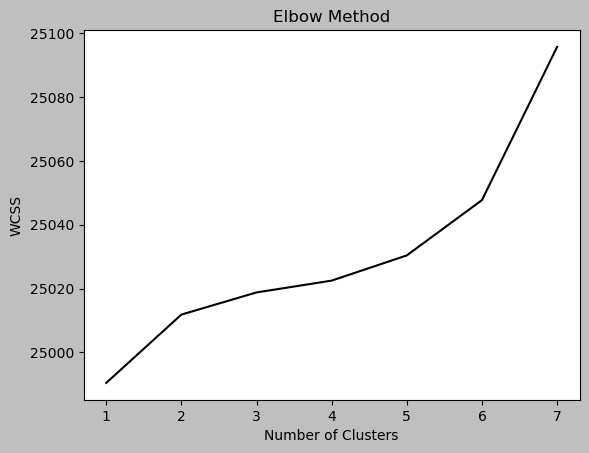

In [26]:
plt.plot(range(1,8),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
var= df[['annual income (k$)','spending score (1-100)']]

In [22]:
k_means= KMeans(n_clusters=5,random_state=42)
y_pred= k_means.fit_predict(var)

In [23]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

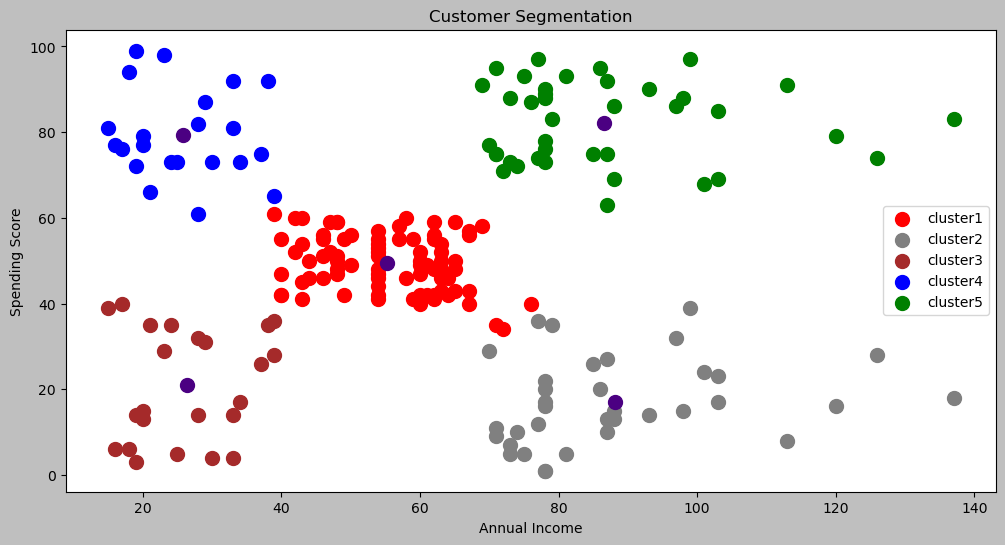

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(var.iloc[y_pred==0,0],var.iloc[y_pred==0,1],s=100,c='red',label='cluster1')
plt.scatter(var.iloc[y_pred==1,0],var.iloc[y_pred==1,1],s=100,c='grey',label='cluster2')
plt.scatter(var.iloc[y_pred==2,0],var.iloc[y_pred==2,1],s=100,c='brown',label='cluster3')
plt.scatter(var.iloc[y_pred==3,0],var.iloc[y_pred==3,1],s=100,c='blue',label='cluster4')
plt.scatter(var.iloc[y_pred==4,0],var.iloc[y_pred==4,1],s=100,c='green',label='cluster5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c='indigo')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend()
plt.show()